In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_columns = 999

# Define Problems
- Mengetahui penyebab Customers melakukan Churn berdasarkan data yang diperoleh.

# Goals
- Mengetahui apakah Customers mayoritas melakukan Churn atau tidak.
- Mengetahui apakah pemberian Cashback setelah berbelanja efektif untuk menahan Customer Churn atau tidak.
- Mengetahui kebiasaan pelanggan dalam berbelanja melalui E-Commerce.
- Mengetahui apakah E-Commerce sudah memberikan pelayanan yang terbaik kepada Customers.

In [3]:
df = pd.read_excel('E Commerce Dataset.xlsx', 'E Comm')
df.head()
# From : https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# Handling Missing Value

In [4]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [5]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [6]:
# Handling Missing Value

In [7]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())

In [8]:
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].median())

In [9]:
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median())

In [10]:
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median())

In [11]:
df['CouponUsed'] = df['CouponUsed'].fillna(df['CouponUsed'].median())

In [12]:
df['OrderCount'] = df['OrderCount'].fillna(df['OrderCount'].median())

In [13]:
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median())

In [14]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [15]:
df.shape

(5630, 20)

In [16]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [17]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,10.134103,1.654707,15.566785,2.934636,3.688988,3.066785,4.214032,0.284902,15.674600,1.716874,2.961812,4.459325,177.223030
std,1625.385339,0.374240,8.357951,0.915389,8.345961,0.705528,1.023999,1.380194,2.583586,0.451408,3.591058,1.857640,2.879248,3.570626,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [18]:
df.describe(include = "O")


,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [19]:
customerDesc = []
for i in df.columns:
    customerDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round(((df[i].isna().sum() / len(df)) * 100),2), 
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(data = customerDesc,
            columns = [
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique',
                'Unique Sample'
            ])
# Untuk mengecek tiap Description Features

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,CustomerID,int64,0,0.0,5630,"[52854, 53710]"
1,Churn,int64,0,0.0,2,"[0, 1]"
2,Tenure,float64,0,0.0,36,"[20.0, 26.0]"
3,PreferredLoginDevice,object,0,0.0,3,"[Mobile Phone, Phone]"
4,CityTier,int64,0,0.0,3,"[1, 3]"
5,WarehouseToHome,float64,0,0.0,34,"[21.0, 30.0]"
6,PreferredPaymentMode,object,0,0.0,7,"[Cash on Delivery, Debit Card]"
7,Gender,object,0,0.0,2,"[Female, Male]"
8,HourSpendOnApp,float64,0,0.0,6,"[0.0, 4.0]"
9,NumberOfDeviceRegistered,int64,0,0.0,6,"[2, 4]"


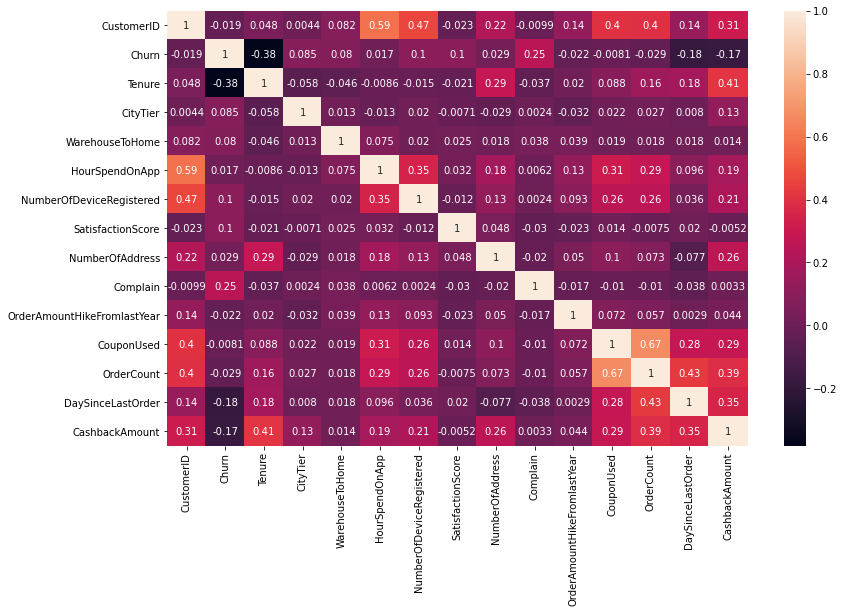

In [20]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr('spearman'), annot=True)
plt.show()

In [21]:
df['Cashback/Order'] = df['CashbackAmount'] / df['OrderCount']

In [22]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Cashback/Order
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,10.134103,1.654707,15.566785,2.934636,3.688988,3.066785,4.214032,0.284902,15.674600,1.716874,2.961812,4.459325,177.223030,95.538860
std,1625.385339,0.374240,8.357951,0.915389,8.345961,0.705528,1.023999,1.380194,2.583586,0.451408,3.591058,1.857640,2.879248,3.570626,49.207036,53.350535
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,51408.250000,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000,57.450833
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000,87.180000
75%,54222.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500,129.330000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000,298.590000


In [23]:
df['Tenure'].unique() # Bulanan langganan

array([ 4.,  9.,  0., 13., 11., 19., 20., 14.,  8., 18.,  5.,  2., 30.,
        1., 23.,  3., 29.,  6., 26., 28.,  7., 24., 25., 10., 15., 22.,
       27., 16., 12., 21., 17., 50., 60., 31., 51., 61.])

In [24]:
# Mengubah Phone menjadi Mobile Phone
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace(['Phone'],'Mobile Phone')

In [25]:
df['PreferredLoginDevice'].unique() # Device yang paling sering digunakan untuk login Apps

array(['Mobile Phone', 'Computer'], dtype=object)

In [26]:
df['CityTier'].unique() # Tingkatan Kota

array([3, 1, 2], dtype=int64)

In [27]:
df['WarehouseToHome'].unique() # Jarak dari gudang ke rumah customer

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  27.,  17.,  23.,  33.,  19.,
        35.,  24.,  16.,  25.,  32.,  34.,   5.,  21., 126.,   7.,  36.,
       127.])

In [28]:
# Mengubah COD menjadi Cash on Delivery & CC menjadi Credit Card
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace(['COD'],'Cash on Delivery')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace(['CC'],'Credit Card')

In [29]:
df['PreferredPaymentMode'].unique() # Metode pembayaran yang dilakukan oleh Customers

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet'],
      dtype=object)

In [30]:
df['Gender'].unique() # Gender

array(['Female', 'Male'], dtype=object)

In [31]:
df['HourSpendOnApp'].unique() # Waktu yang dihabiskan pada Apps

array([3., 2., 1., 0., 4., 5.])

In [32]:
df['NumberOfDeviceRegistered'].unique() # Jumlah Device yang didaftarkan pada Apps

array([3, 4, 5, 2, 1, 6], dtype=int64)

In [33]:
# Mengubah Mobile menjadi Mobile Phone
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace(['Mobile'],'Mobile Phone')

In [34]:
df['PreferedOrderCat'].unique() # Preferensi barang yang dibeli Customers

array(['Laptop & Accessory', 'Mobile Phone', 'Others', 'Fashion',
       'Grocery'], dtype=object)

In [35]:
df['SatisfactionScore'].unique() # Tingkat Kepuasan Customers

array([2, 3, 5, 4, 1], dtype=int64)

In [36]:
df['MaritalStatus'].unique() # Status Martial oleh Customers

array(['Single', 'Divorced', 'Married'], dtype=object)

In [37]:
df['Complain'].unique() # Customers melakukan komplain atau tidak

array([1, 0], dtype=int64)

In [38]:
df['NumberOfAddress'].unique() # Seberapa banyak Address yang dimasukkan oleh Customers

array([ 9,  7,  6,  8,  3,  2,  4, 10,  1,  5, 19, 21, 11, 20, 22],
      dtype=int64)

In [39]:
df['OrderAmountHikeFromlastYear'].unique() # Kenaikan pembelian dari tahun lalu berapa persen

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26.])

In [40]:
df['CouponUsed'].unique() # Penggunaan kupon pada bulan lalu

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., 14., 16.])

In [41]:
df['OrderCount'].unique() # Jumlah order pada bulan lalu

array([ 1.,  6.,  2., 15.,  4.,  7.,  3.,  9., 11.,  5., 12., 10.,  8.,
       13., 14., 16.])

In [42]:
df['DaySinceLastOrder'].unique() # Jumlah hari setelah order terakhir

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15.,  9., 11., 10.,
       13., 12., 17., 16., 14., 30., 46., 18., 31.])

In [43]:
df['CashbackAmount'].unique() # Jumlah Cashback yang didapat oleh customers

array([159.93, 120.9 , 120.28, ..., 173.77, 287.91, 173.78])

In [44]:
# Persentase Churn

In [45]:
pd.crosstab(index=df['Churn'], columns='count', normalize=True)

col_0,count
Churn,
0,0.831616
1,0.168384


In [885]:
# Pengecekan Customers yang melakukan Churn

In [46]:
df_churn = df[df['Churn'] == 1]

In [47]:
df_churn['Cashback/Order'] = df_churn['CashbackAmount'] / df_churn['OrderCount']

In [48]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Cashback/Order'],
      dtype='object')

In [49]:
# Berdasarkan data yang didapatkan, Customers yang melakukan Churn 65.83% menggunakan Mobile Phone, dan 34.17% menggunakan Computer
pd.crosstab(index=df_churn['PreferredLoginDevice'], columns=df_churn['Churn'], normalize = True) * 100

Churn,1
PreferredLoginDevice,
Computer,34.177215
Mobile Phone,65.822785


In [50]:
# Berdasarkan data yang didapatkan, mayoritas Customers yang melakukan Complain memilih untuk Churn sebesar 53.59%
pd.crosstab(index=df_churn['Complain'], columns=df_churn['Churn'], normalize = True) * 100

Churn,1
Complain,
0,46.413502
1,53.586498


In [51]:
# Berdasarkan data yang didapatkan, Customers yang melakukan Churn di dominasi oleh Male sebesar 63.29%
pd.crosstab(index=df_churn['Gender'], columns=df_churn['Churn'], normalize = True) * 100

Churn,1
Gender,
Female,36.708861
Male,63.291139


In [52]:
# Berdasarkan data yang didapatkan, Customers yang berdomisili di CityTier 1 dan 3 paling banyak melakukan Churn
pd.crosstab(index=df_churn['CityTier'], columns=df_churn['Churn'], normalize = True) * 100

Churn,1
CityTier,
1,56.118143
2,5.063291
3,38.818565


In [53]:
# Berdasarkan data yang didapatkan, Customers yang melakukan metode pembayaran Debit Card paling banyak melakukan Churn
pd.crosstab(index=df_churn['PreferredPaymentMode'], columns=df_churn['Churn'], normalize = True) * 100

Churn,1
PreferredPaymentMode,
Cash on Delivery,13.502110
Credit Card,26.582278
Debit Card,37.552743
E wallet,14.767932
UPI,7.594937


In [54]:
# Berdasarkan data yang di dapatkan, Customers yang lebih tertarik pada Kategori Mobile Phone paling banyak melakukan Churn
pd.crosstab(index=df_churn['PreferedOrderCat'], columns=df_churn['Churn'], normalize = True) * 100

Churn,1
PreferedOrderCat,
Fashion,13.502110
Grocery,2.109705
Laptop & Accessory,22.151899
Mobile Phone,60.126582
Others,2.109705


In [55]:
# Berdasarkan data yang didapatkan, Pengguna yang menghabiskan waktu 3 jam pada Aplikasi yang paling banyak melakukan Churn
pd.crosstab(index=df_churn['HourSpendOnApp'], columns=df_churn['Churn'], normalize = True) * 100

Churn,1
HourSpendOnApp,
2.0,24.472574
3.0,54.641350
4.0,20.886076


In [56]:
# Berdasarkan data yang didapatkan, Pengguna yang mendaftarkan Devicenya pada Apps, paling banyak melakukan Churn yaitu pada 4 Device
pd.crosstab(index=df_churn['NumberOfDeviceRegistered'], columns=df_churn['Churn'], normalize = True) * 100

Churn,1
NumberOfDeviceRegistered,
1,2.320675
2,2.742616
3,26.793249
4,41.350211
5,20.886076
6,5.907173


In [57]:
# Berdasarkan data yang didapatkan, Nilai 3 pada kepuasan yang diberikan oleh pelanggan yang paling banyak melakukan Churn
pd.crosstab(index=df_churn['SatisfactionScore'], columns=df_churn['Churn'], normalize = True) * 100

Churn,1
SatisfactionScore,
1,14.135021
2,7.805907
3,30.801688
4,19.409283
5,27.848101


In [58]:
# Berdasarkan data yang didapatkan, paling banyak status Single yang melakukan Churn
pd.crosstab(index=df_churn['MaritalStatus'], columns=df_churn['Churn'], normalize = True) * 100

Churn,1
MaritalStatus,
Divorced,13.080169
Married,36.286920
Single,50.632911


In [59]:
# Berdasarkan data yang didapatkan, jumlah Alamat yang didaftarkan 2 dan 3 paling banyak melakukan Churn
pd.crosstab(index=df_churn['NumberOfAddress'], columns=df_churn['Churn'], normalize = True) * 100

Churn,1
NumberOfAddress,
1,4.746835
2,25.421941
3,24.050633
4,6.856540
5,7.067511
6,6.962025
7,6.751055
8,6.962025
9,4.852321


In [60]:
# Berdasarkan data yang diperoleh, kenaikan jumlah order dari tahun yang lalu mempengaruhi Churn pada customers
pd.crosstab(index=df_churn['OrderAmountHikeFromlastYear'], columns=df_churn['Churn'], normalize = True) * 100

Churn,1
OrderAmountHikeFromlastYear,
11.0,8.649789
12.0,15.189873
13.0,13.502110
14.0,12.236287
15.0,10.126582
16.0,6.751055
17.0,5.696203
18.0,5.696203
19.0,4.641350


In [61]:
# Berdasarkan data yang didapatkan, penggunaan coupon 1 paling banyak yang melakukan Churn
pd.crosstab(index=df_churn['CouponUsed'], columns=df_churn['Churn'], normalize = True) * 100

Churn,1
CouponUsed,
0.0,19.620253
1.0,40.717300
2.0,23.417722
3.0,4.852321
4.0,3.164557
5.0,2.426160
6.0,1.898734
7.0,1.898734
8.0,0.949367


In [62]:
# Berdasarkan data yang didapatkan, Customers yang melakukan OrderCount 1 dan 2 paling banyak melakukan Churn
pd.crosstab(index=df_churn['OrderCount'], columns=df_churn['Churn'], normalize = True) * 100

Churn,1
OrderCount,
1.0,33.333333
2.0,40.928270
3.0,7.172996
4.0,2.953586
5.0,1.476793
6.0,1.687764
7.0,4.430380
8.0,3.375527
9.0,0.843882


In [63]:
# Berdasarkan data yang didapatkan, mayoritas orang yang melakukan churn berkisaran pada orang yang berbelanja setelah 0-3 hari
pd.crosstab(index=df_churn['DaySinceLastOrder'], columns=df_churn['Churn'], normalize = True) * 100

Churn,1
DaySinceLastOrder,
0.0,17.932489
1.0,19.198312
2.0,12.869198
3.0,19.409283
4.0,6.118143
5.0,2.953586
6.0,1.687764
7.0,6.856540
8.0,6.962025


In [64]:
bin_cashback = [0, 53.136667, 80.875000, 135.882500]
label = ['Low', 'Mid', 'High']
df_churn['cashback_bin'] = pd.cut(df_churn['Cashback/Order'], bins=bin_cashback, labels=label)

In [65]:
# Berdasarkan data yang diperoleh, customers yang mendapatkan Cashback yang kategori high cenderung melakukan Churn
pd.crosstab(index=df_churn['cashback_bin'], columns=df_churn['Churn'], normalize = True) * 100

Churn,1
cashback_bin,
Low,24.162679
Mid,35.645933
High,40.191388


In [890]:
# Berdasarkan data yang didapatkan, Customers yang Tenurenya 0 dan 1 bulan paling banyak melakukan Churn
pd.crosstab(index=df_churn['Tenure'], columns=df_churn['Churn'], normalize = True) * 100

Churn,1
Tenure,
0.0,28.691983
1.0,36.814346
2.0,1.476793
3.0,1.898734
4.0,2.109705
5.0,1.687764
6.0,0.843882
7.0,1.687764
8.0,1.687764


# Feature Selection
- Churn **(Target)**
- Tenure
- PreferredLoginDevice
- WarehouseToHome
- PreferredPaymentMode
- Gender
- PreferedOrderCat
- SatisfactionScore
- Complain
- OrderAmountHikeFromlastYear
- CouponUsed
- OrderCount
- DaySinceLastOrder
- CashbackAmount

In [66]:
df_ML = df[['Churn', 'Tenure', 'PreferredLoginDevice', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'SatisfactionScore', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']]

In [67]:
df_ML.head()

,Churn,Tenure,PreferredLoginDevice,WarehouseToHome,PreferredPaymentMode,Gender,PreferedOrderCat,SatisfactionScore,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,6.0,Debit Card,Female,Laptop & Accessory,2,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,Mobile Phone,8.0,UPI,Male,Mobile Phone,3,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,Mobile Phone,30.0,Debit Card,Male,Mobile Phone,3,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Mobile Phone,15.0,Debit Card,Male,Laptop & Accessory,5,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Mobile Phone,12.0,Credit Card,Male,Mobile Phone,5,0,11.0,1.0,1.0,3.0,129.60


In [68]:
df_ML['Complain'].unique()

array([1, 0], dtype=int64)

# Encoding

In [69]:
# Labeling kolom PreferredLoginDevice
df_ML['PreferredLoginDevice'] = df_ML['PreferredLoginDevice'].map({'Mobile Phone' : 0, 'Computer' : 1})

In [70]:
# One Hot Encoding kolom PreferredPaymentMode
df_ML = pd.get_dummies(df_ML, columns=['PreferredPaymentMode'])

In [71]:
# Labeling kolom Gender
df_ML['Gender'] = df_ML['Gender'].map({'Female' : 0, 'Male' : 1})

In [72]:
# One Hot Encoding kolom PreferedOrderCat
df_ML = pd.get_dummies(df_ML, columns=['PreferedOrderCat'])

In [73]:
df_ML.head()

,Churn,Tenure,PreferredLoginDevice,WarehouseToHome,Gender,SatisfactionScore,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others
0,1,4.0,0,6.0,0,2,1,11.0,1.0,1.0,5.0,159.93,0,0,1,0,0,0,0,1,0,0
1,1,9.0,0,8.0,1,3,1,15.0,0.0,1.0,0.0,120.90,0,0,0,0,1,0,0,0,1,0
2,1,9.0,0,30.0,1,3,1,14.0,0.0,1.0,3.0,120.28,0,0,1,0,0,0,0,0,1,0
3,1,0.0,0,15.0,1,5,0,23.0,0.0,1.0,3.0,134.07,0,0,1,0,0,0,0,1,0,0
4,1,0.0,0,12.0,1,5,0,11.0,1.0,1.0,3.0,129.60,0,1,0,0,0,0,0,0,1,0


# Simple Model

In [74]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

In [75]:
# Splitting Data

In [76]:
X = df_ML.drop(columns='Churn')
y = df_ML['Churn']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.20, random_state = 42)

In [78]:
# Eva Matrix
def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    Acc = accuracy_score(y_true, y_pred)
    Rec = recall_score(y_true, y_pred)
    Prec = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return Acc, Rec, Prec, f1

In [79]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# 1. LogisticRegression

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
Model_LR = LogisticRegression()

In [82]:
Model_LR.fit(X_train, y_train)

LogisticRegression()

## Evaluation Base Model Logistic Regression

In [83]:
# Evaluation Base Model Logistic Regression
Log_Acc_train, Log_Rec_train, Log_Prec_train, Log_f1_train = Eva_Matrix(Model_LR, X_train, y_train)
Log_Acc_test, Log_Rec_test, Log_Prec_test, Log_f1_test = Eva_Matrix(Model_LR, X_test, y_test)
data_log = {
    "Log Train" : [Log_Acc_train, Log_Rec_train, Log_Prec_train, Log_f1_train],
    "Log Test" : [Log_Acc_test, Log_Rec_test, Log_Prec_test, Log_f1_test]
}
pd.DataFrame(data=data_log, index=['Accuracy', 'Recall', 'Precision', 'F1'])

,Log Train,Log Test
Accuracy,0.874556,0.860568
Recall,0.431398,0.410526
Precision,0.709328,0.634146
F1,0.536505,0.498403


              precision    recall  f1-score   support

           0       0.89      0.95      0.92       936
           1       0.63      0.41      0.50       190

    accuracy                           0.86      1126
   macro avg       0.76      0.68      0.71      1126
weighted avg       0.85      0.86      0.85      1126



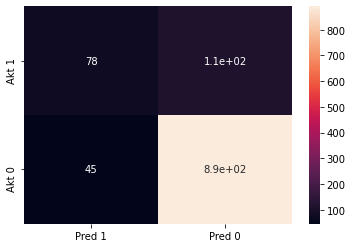

In [84]:
from sklearn.metrics import confusion_matrix, classification_report
y_LR_test = Model_LR.predict(X_test)
print(classification_report(y_test, y_LR_test))
cm_LR_test = confusion_matrix(y_test, y_LR_test, labels = [1,0])
df_LR_test = pd.DataFrame(data=cm_LR_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_LR_test, annot=True)
plt.show()

# 2. KNeighborsClassifier

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
Model_KNN = KNeighborsClassifier()

In [87]:
Model_KNN.fit(X_train, y_train)

KNeighborsClassifier()

## Evaluation Base Model KNeighborsClassifier

In [88]:
# Evaluation Base Model KNeighborsClassifier
KNN_Acc_train, KNN_Rec_train, KNN_Prec_train, KNN_f1_train = Eva_Matrix(Model_KNN, X_train, y_train)
KNN_Acc_test, KNN_Rec_test, KNN_Prec_test, KNN_f1_test = Eva_Matrix(Model_KNN, X_test, y_test)
data_KNN = {
    "KNN Train" : [KNN_Acc_train, KNN_Rec_train, KNN_Prec_train, KNN_f1_train],
    "KNN Test" : [KNN_Acc_test, KNN_Rec_test, KNN_Prec_test, KNN_f1_test]
}
pd.DataFrame(data=data_KNN, index=['Accuracy', 'Recall', 'Precision', 'F1'])

,KNN Train,KNN Test
Accuracy,0.898313,0.859680
Recall,0.517150,0.357895
Precision,0.809917,0.653846
F1,0.631240,0.462585


              precision    recall  f1-score   support

           0       0.88      0.96      0.92       936
           1       0.65      0.36      0.46       190

    accuracy                           0.86      1126
   macro avg       0.77      0.66      0.69      1126
weighted avg       0.84      0.86      0.84      1126



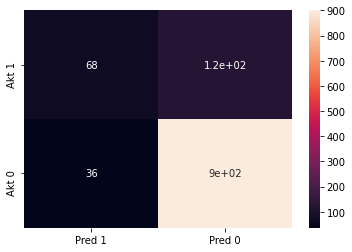

In [89]:
from sklearn.metrics import confusion_matrix, classification_report
y_KNN_test = Model_KNN.predict(X_test)
print(classification_report(y_test, y_KNN_test))
cm_KNN_test = confusion_matrix(y_test, y_KNN_test, labels = [1,0])
df_KNN_test = pd.DataFrame(data=cm_KNN_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_KNN_test, annot=True)
plt.show()

# 3. SVM

In [90]:
from sklearn.svm import SVC

In [91]:
Model_SVM = SVC(max_iter=400)

In [92]:
Model_SVM.fit(X_train, y_train)

SVC(max_iter=400)

## Evaluation Base Model SVM

In [93]:
# Evaluation Base Model SVM
SVM_Acc_train, SVM_Rec_train, SVM_Prec_train, SVM_f1_train = Eva_Matrix(Model_SVM, X_train, y_train)
SVM_Acc_test, SVM_Rec_test, SVM_Prec_test, SVM_f1_test = Eva_Matrix(Model_SVM, X_test, y_test)
data_SVM = {
    "SVM Train" : [SVM_Acc_train, SVM_Rec_train, SVM_Prec_train, SVM_f1_train],
    "SVM Test" : [SVM_Acc_test, SVM_Rec_test, SVM_Prec_test, SVM_f1_test]
}
pd.DataFrame(data=data_SVM, index=['Accuracy', 'Recall', 'Precision', 'F1'])

,SVM Train,SVM Test
Accuracy,0.281083,0.269094
Recall,0.973615,0.936842
Precision,0.186552,0.179980
F1,0.313110,0.301951


              precision    recall  f1-score   support

           0       0.91      0.13      0.23       936
           1       0.18      0.94      0.30       190

    accuracy                           0.27      1126
   macro avg       0.55      0.54      0.27      1126
weighted avg       0.79      0.27      0.24      1126



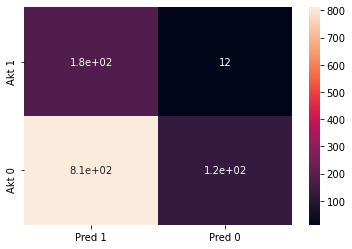

In [94]:
from sklearn.metrics import confusion_matrix, classification_report
y_SVM_test = Model_SVM.predict(X_test)
print(classification_report(y_test, y_SVM_test))
cm_SVM_test = confusion_matrix(y_test, y_SVM_test, labels = [1,0])
df_SVM_test = pd.DataFrame(data=cm_SVM_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_SVM_test, annot=True)
plt.show()

### =======================================================================

# Improvement Scalling

In [95]:
from sklearn.preprocessing import RobustScaler

In [96]:
df_ML.head()

,Churn,Tenure,PreferredLoginDevice,WarehouseToHome,Gender,SatisfactionScore,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others
0,1,4.0,0,6.0,0,2,1,11.0,1.0,1.0,5.0,159.93,0,0,1,0,0,0,0,1,0,0
1,1,9.0,0,8.0,1,3,1,15.0,0.0,1.0,0.0,120.90,0,0,0,0,1,0,0,0,1,0
2,1,9.0,0,30.0,1,3,1,14.0,0.0,1.0,3.0,120.28,0,0,1,0,0,0,0,0,1,0
3,1,0.0,0,15.0,1,5,0,23.0,0.0,1.0,3.0,134.07,0,0,1,0,0,0,0,1,0,0
4,1,0.0,0,12.0,1,5,0,11.0,1.0,1.0,3.0,129.60,0,1,0,0,0,0,0,0,1,0


In [97]:
df_ML['CouponUsed'].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., 14., 16.])

In [98]:
df_ML.reset_index(inplace=True)

In [99]:
df_ML.drop(columns='index',inplace=True)

In [100]:
sc = RobustScaler()

In [101]:
num_col = df_ML[['Tenure', 'WarehouseToHome', 'SatisfactionScore', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']]

In [102]:
sc_train = sc.fit_transform(num_col)

In [103]:
train_sc = pd.DataFrame(sc_train)

In [104]:
df_scaled = pd.concat([df_ML,train_sc],axis=1)
df_scaled.head()

,Churn,Tenure,PreferredLoginDevice,WarehouseToHome,Gender,SatisfactionScore,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,0,1,2,3,4,5,6,7
0,1,4.0,0,6.0,0,2,1,11.0,1.0,1.0,5.0,159.93,0,0,1,0,0,0,0,1,0,0,-0.416667,-0.727273,-0.5,-0.8,0.0,-0.5,0.4,-0.066176
1,1,9.0,0,8.0,1,3,1,15.0,0.0,1.0,0.0,120.90,0,0,0,0,1,0,0,0,1,0,0.000000,-0.545455,0.0,0.0,-1.0,-0.5,-0.6,-0.837177
2,1,9.0,0,30.0,1,3,1,14.0,0.0,1.0,3.0,120.28,0,0,1,0,0,0,0,0,1,0,0.000000,1.454545,0.0,-0.2,-1.0,-0.5,0.0,-0.849425
3,1,0.0,0,15.0,1,5,0,23.0,0.0,1.0,3.0,134.07,0,0,1,0,0,0,0,1,0,0,-0.750000,0.090909,1.0,1.6,-1.0,-0.5,0.0,-0.577016
4,1,0.0,0,12.0,1,5,0,11.0,1.0,1.0,3.0,129.60,0,1,0,0,0,0,0,0,1,0,-0.750000,-0.181818,1.0,-0.8,0.0,-0.5,0.0,-0.665317


In [105]:
X_scaled = df_scaled.drop(columns='Churn')
y_scaled = df_scaled['Churn']
X_train_SC, X_test_SC, y_train_SC, y_test_SC = train_test_split(X_scaled, y_scaled, stratify= y_scaled, test_size=0.2, random_state=42)

# Improvement Logistic Regression dengan Scalling

In [106]:
Model_LR.fit(X_train_SC, y_train_SC)

LogisticRegression()

In [107]:
LRSC_Acc_train, LRSC_Rec_train, LRSC_Prec_train, LRSC_f1_train = Eva_Matrix(Model_LR, X_train_SC, y_train_SC)
LRSC_Acc_test, LRSC_Rec_test, LRSC_Prec_test, LRSC_f1_test = Eva_Matrix(Model_LR, X_test_SC, y_test_SC)
data_LRSC ={
    'LRScaled Train' : [LRSC_Acc_train, LRSC_Rec_train, LRSC_Prec_train, LRSC_f1_train],
    'LRScaled Test': [LRSC_Acc_test, LRSC_Rec_test, LRSC_Prec_test, LRSC_f1_test] 
}
pd.DataFrame(data=data_LRSC, index=['Accuracy', 'Recall','Precision','F1'])

,LRScaled Train,LRScaled Test
Accuracy,0.874112,0.856128
Recall,0.430079,0.405263
Precision,0.707158,0.611111
F1,0.534865,0.487342


              precision    recall  f1-score   support

           0       0.89      0.95      0.92       936
           1       0.61      0.41      0.49       190

    accuracy                           0.86      1126
   macro avg       0.75      0.68      0.70      1126
weighted avg       0.84      0.86      0.84      1126



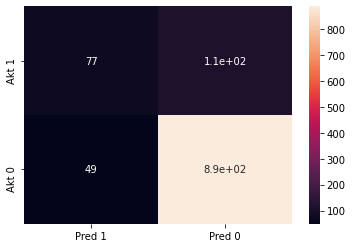

In [108]:
from sklearn.metrics import confusion_matrix, classification_report
y_LRSC_test = Model_LR.predict(X_test_SC)
print(classification_report(y_test_SC, y_LRSC_test))
cm_LRSC_test = confusion_matrix(y_test_SC, y_LRSC_test, labels = [1,0])
df_LRSC_test = pd.DataFrame(data=cm_LRSC_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_LRSC_test, annot=True)
plt.show()

# Improvement KNeighborsClassifier dengan Scalling

In [109]:
Model_KNN.fit(X_train_SC, y_train_SC)

KNeighborsClassifier()

In [110]:
KNNSC_Acc_train, KNNSC_Rec_train, KNNSC_Prec_train, KNNSC_f1_train = Eva_Matrix(Model_KNN, X_train_SC, y_train_SC)
KNNSC_Acc_test, KNNSC_Rec_test, KNNSC_Prec_test, KNNSC_f1_test = Eva_Matrix(Model_KNN, X_test_SC, y_test_SC)
data_KNNSC ={
    'KNNScaled Train' : [KNNSC_Acc_train, KNNSC_Rec_train, KNNSC_Prec_train, KNNSC_f1_train],
    'KNNScaled Test': [KNNSC_Acc_test, KNNSC_Rec_test, KNNSC_Prec_test, KNNSC_f1_test] 
}
pd.DataFrame(data=data_KNNSC, index=['Accuracy', 'Recall','Precision','F1'])

,KNNScaled Train,KNNScaled Test
Accuracy,0.896980,0.855240
Recall,0.513193,0.321053
Precision,0.803719,0.642105
F1,0.626409,0.428070


              precision    recall  f1-score   support

           0       0.87      0.96      0.92       936
           1       0.64      0.32      0.43       190

    accuracy                           0.86      1126
   macro avg       0.76      0.64      0.67      1126
weighted avg       0.84      0.86      0.83      1126



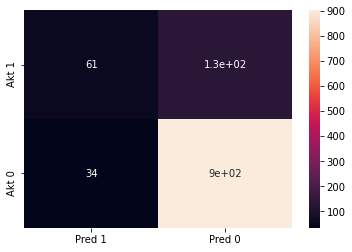

In [111]:
from sklearn.metrics import confusion_matrix, classification_report
y_KNNSC_test = Model_KNN.predict(X_test_SC)
print(classification_report(y_test_SC, y_KNNSC_test))
cm_KNNSC_test = confusion_matrix(y_test_SC, y_KNNSC_test, labels = [1,0])
df_KNNSC_test = pd.DataFrame(data=cm_KNNSC_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_KNNSC_test, annot=True)
plt.show()

In [112]:
# Manual Tuning

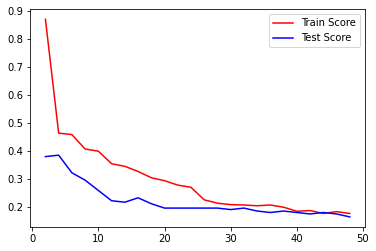

In [113]:
N_range = range(2, 50, 2)
train_acc = []
test_acc = []

for i in N_range:
    Model = KNeighborsClassifier(n_neighbors=i, weights='uniform', p=1)
    Model.fit(X_train, y_train)
    y_pred_tr = Model.predict(X_train)
    y_pred_ts = Model.predict(X_test)
    acc_train = recall_score(y_train, y_pred_tr)
    acc_test = recall_score(y_test, y_pred_ts)
    train_acc.append(acc_train)
    test_acc.append(acc_test)
    
plt.plot(N_range, train_acc, 'r', label='Train Score')
plt.plot(N_range, test_acc, 'b', label='Test Score')
plt.legend()
plt.show()

In [114]:
N_range[np.argmax(test_acc)]

4

In [115]:
# Remodelling

In [116]:
KNN_best = KNeighborsClassifier(n_neighbors = 1)

In [117]:
KNN_best.fit(X_train_SC, y_train_SC)

KNeighborsClassifier(n_neighbors=1)

In [118]:
KNNSC1_Acc_train, KNNSC1_Rec_train, KNNSC1_Prec_train, KNNSC1_f1_train = Eva_Matrix(KNN_best, X_train_SC, y_train_SC)
KNNSC1_Acc_test, KNNSC1_Rec_test, KNNSC1_Prec_test, KNNSC1_f1_test = Eva_Matrix(KNN_best, X_test_SC, y_test_SC)
data_KNNSC1 ={
    'KNNScaled Train' : [KNNSC1_Acc_train, KNNSC1_Rec_train, KNNSC1_Prec_train, KNNSC1_f1_train],
    'KNNScaled Test': [KNNSC1_Acc_test, KNNSC1_Rec_test, KNNSC1_Prec_test, KNNSC1_f1_test] 
}
pd.DataFrame(data=data_KNNSC1, index=['Accuracy', 'Recall','Precision','F1'])

,KNNScaled Train,KNNScaled Test
Accuracy,1.0,0.952043
Recall,1.0,0.878947
Precision,1.0,0.843434
F1,1.0,0.860825


              precision    recall  f1-score   support

           0       0.98      0.97      0.97       936
           1       0.84      0.88      0.86       190

    accuracy                           0.95      1126
   macro avg       0.91      0.92      0.92      1126
weighted avg       0.95      0.95      0.95      1126



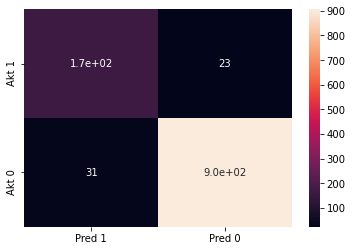

In [119]:
from sklearn.metrics import confusion_matrix, classification_report
y_KNNSC_test_tuned = KNN_best.predict(X_test_SC)
print(classification_report(y_test_SC, y_KNNSC_test_tuned))
cm_KNNSC_test_tuned = confusion_matrix(y_test_SC, y_KNNSC_test_tuned, labels = [1,0])
df_KNNSC_test_tuned = pd.DataFrame(data=cm_KNNSC_test_tuned, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_KNNSC_test_tuned, annot=True)
plt.show()

# Improvement SVM dengan Scalling

In [120]:
Model_SVM.fit(X_train_SC, y_train_SC)

SVC(max_iter=400)

In [121]:
SVMSC_Acc_train, SVMSC_Rec_train, SVMSC_Prec_train, SVMSC_f1_train = Eva_Matrix(Model_SVM, X_train_SC, y_train_SC)
SVMSC_Acc_test, SVMSC_Rec_test, SVMSC_Prec_test, SVMSC_f1_test = Eva_Matrix(Model_SVM, X_test_SC, y_test_SC)
data_SVMSC ={
    'SVMScaled Train' : [SVMSC_Acc_train, SVMSC_Rec_train, SVMSC_Prec_train, SVMSC_f1_train],
    'SVMScaled Test': [SVMSC_Acc_test, SVMSC_Rec_test, SVMSC_Prec_test, SVMSC_f1_test] 
}
pd.DataFrame(data=data_SVMSC, index=['Accuracy', 'Recall','Precision','F1'])

,SVMScaled Train,SVMScaled Test
Accuracy,0.276865,0.265542
Recall,0.976253,0.936842
Precision,0.185976,0.179255
F1,0.312434,0.300930


              precision    recall  f1-score   support

           0       0.91      0.13      0.23       936
           1       0.18      0.94      0.30       190

    accuracy                           0.27      1126
   macro avg       0.54      0.53      0.26      1126
weighted avg       0.79      0.27      0.24      1126



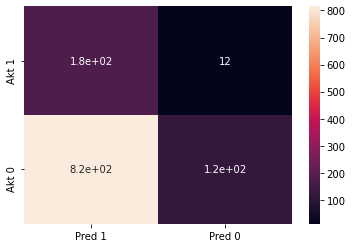

In [122]:
from sklearn.metrics import confusion_matrix, classification_report
y_SVMSC_test = Model_SVM.predict(X_test_SC)
print(classification_report(y_test_SC, y_SVMSC_test))
cm_SVMSC_test = confusion_matrix(y_test_SC, y_SVMSC_test, labels = [1,0])
df_SVMSC_test = pd.DataFrame(data=cm_SVMSC_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_SVMSC_test, annot=True)
plt.show()

### =======================================================================

In [123]:
# Evaluation Matrix Function
def Eva_Matrix1(Model, X_train, y_train, X_test, y_test, Name):
    y_pred_train = Model.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    rec_train = recall_score(y_train, y_pred_train)
    prec_train = precision_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)
    y_pred_test = Model.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    rec_test = recall_score(y_test, y_pred_test)
    prec_test = precision_score(y_test, y_pred_test)
    f1_test = f1_score(y_train, y_pred_train)
    data = {
        f"Training {Name}" : [acc_train, rec_train, prec_train, f1_train],
        f"Test {Name}" : [acc_test, rec_test, prec_test, f1_test]
    }
    df = pd.DataFrame(data=data, index=['Accuracy', 'Recall', 'Precision', 'F1'])
    return df

# Hyper Parameter Tuning

## LogisticRegression Base

In [124]:
skf = StratifiedKFold(n_splits=3)

In [125]:
LR_Tuned = LogisticRegression()

In [126]:
param_LR = {
    "C" : np.logspace(-3, 3, 7),
    "penalty" : ['l1', 'l2', 'elasticnet']
}

In [127]:
GS_LR = GridSearchCV(LR_Tuned, param_LR, cv = skf, n_jobs = 1, verbose = 1, scoring='recall')

In [128]:
GS_LR.fit(X_train, y_train)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    5.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='recall', verbose=1)

In [129]:
GS_LR.best_params_

{'C': 100.0, 'penalty': 'l2'}

In [130]:
LR_Tuned = GS_LR.best_estimator_

In [131]:
df_LR_Tuned = Eva_Matrix1(LR_Tuned, X_train, y_train, X_test, y_test, "Model (LR Tuned)")
df_LR_Tuned

,Training Model (LR Tuned),Test Model (LR Tuned)
Accuracy,0.874556,0.862345
Recall,0.432718,0.405263
Precision,0.708423,0.647059
F1,0.537265,0.537265


              precision    recall  f1-score   support

           0       0.89      0.96      0.92       936
           1       0.65      0.41      0.50       190

    accuracy                           0.86      1126
   macro avg       0.77      0.68      0.71      1126
weighted avg       0.85      0.86      0.85      1126



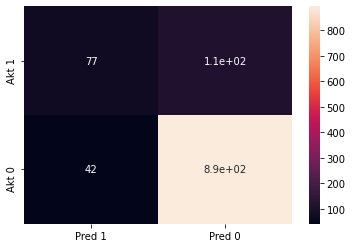

In [132]:
from sklearn.metrics import confusion_matrix, classification_report
y_LRTuned_test = LR_Tuned.predict(X_test)
print(classification_report(y_test, y_LRTuned_test))
cm_LRTuned_test = confusion_matrix(y_test, y_LRTuned_test, labels = [1,0])
df_LRTuned_test = pd.DataFrame(data=cm_LRTuned_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_LRTuned_test, annot=True)
plt.show()

## LogisticRegression Scaled

In [133]:
skf = StratifiedKFold(n_splits=3)

In [134]:
LR_TunedSC = LogisticRegression()

In [135]:
param_LRSC = {
    "C" : np.logspace(-3, 3, 7),
    "penalty" : ['l1', 'l2', 'elasticnet']
}

In [136]:
GS_LRSC = GridSearchCV(LR_TunedSC, param_LRSC, cv = skf, n_jobs = 1, verbose = 1, scoring='recall')

In [137]:
GS_LRSC.fit(X_train_SC, y_train_SC)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    5.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='recall', verbose=1)

In [138]:
GS_LRSC.best_params_

{'C': 1000.0, 'penalty': 'l2'}

In [139]:
LR_Tuned_Scaled = GS_LRSC.best_estimator_

In [140]:
df_LR_Tuned_Scaled = Eva_Matrix1(LR_Tuned_Scaled, X_train_SC, y_train_SC, X_test_SC, y_test_SC, "Model (LR Tuned Scaled)")
df_LR_Tuned_Scaled

,Training Model (LR Tuned Scaled),Test Model (LR Tuned Scaled)
Accuracy,0.874112,0.857904
Recall,0.418206,0.405263
Precision,0.715576,0.620968
F1,0.527893,0.527893


              precision    recall  f1-score   support

           0       0.89      0.95      0.92       936
           1       0.62      0.41      0.49       190

    accuracy                           0.86      1126
   macro avg       0.75      0.68      0.70      1126
weighted avg       0.84      0.86      0.85      1126



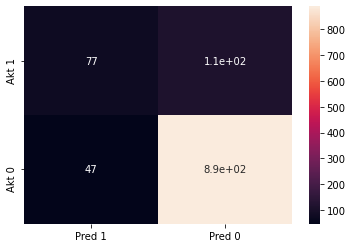

In [141]:
from sklearn.metrics import confusion_matrix, classification_report
y_LRTuned_SC_test = LR_Tuned_Scaled.predict(X_test_SC)
print(classification_report(y_test_SC, y_LRTuned_SC_test))
cm_LRTuned_SC_test = confusion_matrix(y_test_SC, y_LRTuned_SC_test, labels = [1,0])
df_LRTuned_SC_test = pd.DataFrame(data=cm_LRTuned_SC_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_LRTuned_SC_test, annot=True)
plt.show()

In [142]:
###############################################################################################

## KNN Base

In [143]:
KNN_Tuned = KNeighborsClassifier()

In [144]:
param_KNN = {
    'n_neighbors' : np.arange(1,51,10),
    'weights' : ['uniform','distance'],
    'p' : [2, 1]
}

In [145]:
KNN_Tuned = GridSearchCV(KNN_Tuned, param_KNN, cv = skf, n_jobs = -1, verbose = 1, scoring = 'recall')

In [146]:
KNN_Tuned.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    9.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1, 11, 21, 31, 41]),
                         'p': [2, 1], 'weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)

In [147]:
KNN_Tuned.best_params_

{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

In [148]:
KNN_Tuned = KNN_Tuned.best_estimator_

In [149]:
df_KNN_Tuned = Eva_Matrix1(KNN_Tuned, X_train, y_train, X_test, y_test, "Model (KNN Tuned)")
df_KNN_Tuned

,Training Model (KNN Tuned),Test Model (KNN Tuned)
Accuracy,1.0,0.968917
Recall,1.0,0.931579
Precision,1.0,0.889447
F1,1.0,1.000000


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       936
           1       0.89      0.93      0.91       190

    accuracy                           0.97      1126
   macro avg       0.94      0.95      0.95      1126
weighted avg       0.97      0.97      0.97      1126



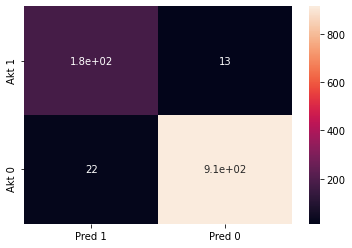

In [150]:
from sklearn.metrics import confusion_matrix, classification_report
y_KNNTuned_test = KNN_Tuned.predict(X_test)
print(classification_report(y_test, y_KNNTuned_test))
cm_KNNTuned_test = confusion_matrix(y_test, y_KNNTuned_test, labels = [1,0])
df_KNNTuned_test = pd.DataFrame(data=cm_KNNTuned_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_KNNTuned_test, annot=True)
plt.show()

## KNN Scaled

In [151]:
KNN_TunedSC = KNeighborsClassifier()

In [152]:
param_KNNSC = {
    'n_neighbors' : np.arange(1,51,10),
    'weights' : ['uniform','distance'],
    'p' : [2, 1]
}

In [153]:
KNN_TunedSC = GridSearchCV(KNN_TunedSC, param_KNNSC, cv = skf, n_jobs = -1, verbose = 1, scoring = 'recall')

In [154]:
KNN_TunedSC.fit(X_train_SC, y_train_SC)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    6.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1, 11, 21, 31, 41]),
                         'p': [2, 1], 'weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)

In [155]:
KNN_TunedSC.best_params_

{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

In [156]:
KNN_TunedSC = KNN_TunedSC.best_estimator_

In [157]:
df_KNN_TunedSC = Eva_Matrix1(KNN_TunedSC, X_train_SC, y_train, X_test_SC, y_test, "Model (KNN Tuned Scaled)")
df_KNN_TunedSC

,Training Model (KNN Tuned Scaled),Test Model (KNN Tuned Scaled)
Accuracy,1.0,0.962700
Recall,1.0,0.910526
Precision,1.0,0.873737
F1,1.0,1.000000


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       936
           1       0.87      0.91      0.89       190

    accuracy                           0.96      1126
   macro avg       0.93      0.94      0.93      1126
weighted avg       0.96      0.96      0.96      1126



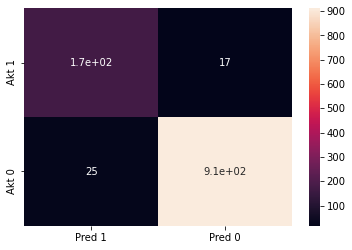

In [158]:
from sklearn.metrics import confusion_matrix, classification_report
y_KNNTuned_SC_test = KNN_TunedSC.predict(X_test_SC)
print(classification_report(y_test_SC, y_KNNTuned_SC_test))
cm_KNNTuned_SC_test = confusion_matrix(y_test_SC, y_KNNTuned_SC_test, labels = [1,0])
df_KNNTuned_SC_test = pd.DataFrame(data=cm_KNNTuned_SC_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_KNNTuned_SC_test, annot=True)
plt.show()

In [159]:
###############################################################################################

## SVM Base

In [160]:
SVM_Tuned = SVC(max_iter=400)

In [161]:
param_SVM = {
    "C" : np.logspace(-3,3,7),
    "gamma" : np.arange(10, 101, 10),
}

In [162]:
SVM_Tuned = GridSearchCV(SVM_Tuned, param_SVM, cv = skf, n_jobs = -1, verbose = 1, scoring = 'recall')

In [163]:
SVM_Tuned.fit(X_train, y_train)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:  1.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SVC(max_iter=400), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             scoring='recall', verbose=1)

In [164]:
SVM_Tuned.best_params_

{'C': 0.001, 'gamma': 100}

In [165]:
SVM_Tuned = SVM_Tuned.best_estimator_

In [166]:
df_SVM_Tuned = Eva_Matrix1(SVM_Tuned, X_train, y_train, X_test, y_test, "Model (SVM Tuned)")
df_SVM_Tuned

,Training Model (SVM Tuned),Test Model (SVM Tuned)
Accuracy,0.314831,0.242451
Recall,0.998681,1.000000
Precision,0.197033,0.182167
F1,0.329130,0.329130


              precision    recall  f1-score   support

           0       1.00      0.09      0.16       936
           1       0.18      1.00      0.31       190

    accuracy                           0.24      1126
   macro avg       0.59      0.54      0.24      1126
weighted avg       0.86      0.24      0.19      1126



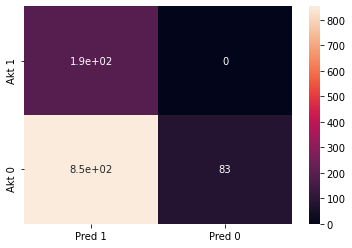

In [167]:
from sklearn.metrics import confusion_matrix, classification_report
y_SVMTuned_test = SVM_Tuned.predict(X_test)
print(classification_report(y_test, y_SVMTuned_test))
cm_SVMTuned_test = confusion_matrix(y_test, y_SVMTuned_test, labels = [1,0])
df_SVMTuned_test = pd.DataFrame(data=cm_SVMTuned_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_SVMTuned_test, annot=True)
plt.show()

## SVM Scaled

In [168]:
SVM_TunedSC = SVC(max_iter=400)

In [169]:
param_SVMSC = {
    "C" : np.logspace(-3,3,7),
    "gamma" : np.arange(10, 101, 10),
}

In [170]:
SVM_TunedSC = GridSearchCV(SVM_TunedSC, param_SVMSC, cv = skf, n_jobs = -1, verbose = 1, scoring = 'recall')

In [171]:
SVM_TunedSC.fit(X_train_SC, y_train_SC)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:  1.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SVC(max_iter=400), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             scoring='recall', verbose=1)

In [172]:
SVM_TunedSC.best_params_

{'C': 0.001, 'gamma': 100}

In [173]:
SVM_TunedSC = SVM_TunedSC.best_estimator_

In [174]:
df_SVM_TunedSC = Eva_Matrix1(SVM_TunedSC, X_train_SC, y_train_SC, X_test_SC, y_test_SC, "Model (SVM Scaled Tuned)")
df_SVM_TunedSC

,Training Model (SVM Scaled Tuned),Test Model (SVM Scaled Tuned)
Accuracy,0.309281,0.232682
Recall,0.998681,0.994737
Precision,0.195759,0.179658
F1,0.327351,0.327351


              precision    recall  f1-score   support

           0       0.99      0.08      0.14       936
           1       0.18      0.99      0.30       190

    accuracy                           0.23      1126
   macro avg       0.58      0.54      0.22      1126
weighted avg       0.85      0.23      0.17      1126



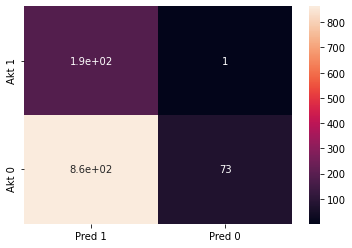

In [175]:
from sklearn.metrics import confusion_matrix, classification_report
y_SVMTuned_SC_test = SVM_TunedSC.predict(X_test_SC)
print(classification_report(y_test_SC, y_SVMTuned_SC_test))
cm_SVMTuned_SC_test = confusion_matrix(y_test_SC, y_SVMTuned_SC_test, labels = [1,0])
df_SVMTuned_SC_test = pd.DataFrame(data=cm_SVMTuned_SC_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_SVMTuned_SC_test, annot=True)
plt.show()

### ==============================================================

## Decision Tree Classifier

In [176]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [177]:
Model_DT = DecisionTreeClassifier()

In [178]:
Model_DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [179]:
DT_Acc_train, DT_Rec_train, DT_Prec_train, DT_f1_train = Eva_Matrix(Model_DT, X_train, y_train)
DT_Acc_test, DT_Rec_test, DT_Prec_test, DT_f1_test = Eva_Matrix(Model_DT, X_test, y_test)
data_DT ={
    'DT Train' : [DT_Acc_train, DT_Rec_train, DT_Prec_train, DT_f1_train],
    'DT Test': [DT_Acc_test, DT_Rec_test, DT_Prec_test, DT_f1_test] 
}
pd.DataFrame(data=data_DT, index=['Accuracy', 'Recall','Precision','F1'])

,DT Train,DT Test
Accuracy,1.0,0.966252
Recall,1.0,0.900000
Precision,1.0,0.900000
F1,1.0,0.900000


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       936
           1       0.90      0.90      0.90       190

    accuracy                           0.97      1126
   macro avg       0.94      0.94      0.94      1126
weighted avg       0.97      0.97      0.97      1126



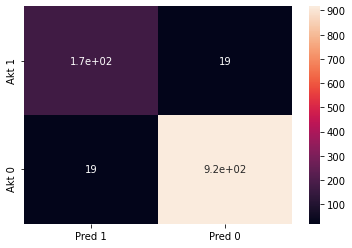

In [180]:
from sklearn.metrics import confusion_matrix, classification_report
y_DT_test = Model_DT.predict(X_test)
print(classification_report(y_test, y_DT_test))
cm_DT_test = confusion_matrix(y_test, y_DT_test, labels = [1,0])
df_DT_test = pd.DataFrame(data=cm_DT_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_DT_test, annot=True)
plt.show()

## Hyper Parameter Tuned Decision Tree Classifier

In [181]:
param_DT = {
    "max_depth" : [None, 2, 5],
    "min_samples_split" : np.arange(0, 20, 2),
    "min_samples_leaf" : np.arange(0, 20, 4),
    "max_features" : [None, np.arange(0, 0.6, 0.1)],
    "class_weight" : [{0 : x, 1 : 1 - x} for x in [.4, .45, .5]]
}

In [182]:
DT_Tuned = GridSearchCV(Model_DT, param_DT, cv = skf, n_jobs = -1, verbose = 1, scoring='recall')

In [183]:
DT_Tuned.fit(X_train, y_train)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:   23.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{0: 0.4, 1: 0.6}, {0: 0.45, 1: 0.55},
                                          {0: 0.5, 1: 0.5}],
                         'max_depth': [None, 2, 5],
                         'max_features': [None,
                                          array([0. , 0.1, 0.2, 0.3, 0.4, 0.5])],
                         'min_samples_leaf': array([ 0,  4,  8, 12, 16]),
                         'min_samples_split': array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])},
             scoring='recall', verbose=1)

In [184]:
DT_Tuned.best_params_

{'class_weight': {0: 0.4, 1: 0.6},
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 8}

## Fine Tuning Decision Tree Classifier

In [666]:
DT_Tuned = DecisionTreeClassifier(class_weight = {0: 0.365, 1: 0.635}, max_depth = None, max_features = None, min_samples_leaf = 3, min_samples_split = 23)

In [667]:
DT_Tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.365, 1: 0.635}, min_samples_leaf=3,
                       min_samples_split=23)

In [668]:
y_predDT_tuned = DT_Tuned.predict(X_test)

In [669]:
df_DT_Tuned = Eva_Matrix1(DT_Tuned, X_train, y_train, X_test, y_test, "Model (DT Tuned)")
df_DT_Tuned

,Training Model (DT Tuned),Test Model (DT Tuned)
Accuracy,0.927176,0.903197
Recall,0.853562,0.805263
Precision,0.748843,0.680000
F1,0.797781,0.797781


              precision    recall  f1-score   support

           0       0.96      0.92      0.94       936
           1       0.68      0.81      0.74       190

    accuracy                           0.90      1126
   macro avg       0.82      0.86      0.84      1126
weighted avg       0.91      0.90      0.91      1126



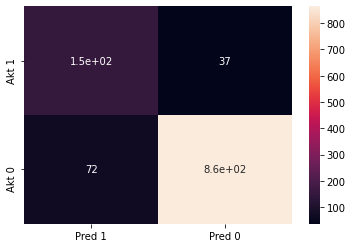

In [670]:
from sklearn.metrics import confusion_matrix, classification_report
y_DT_tuned_test = DT_Tuned.predict(X_test)
print(classification_report(y_test, y_DT_tuned_test))
cm_DT_tuned_test = confusion_matrix(y_test, y_DT_tuned_test, labels = [1,0])
df_DT_tuned_test = pd.DataFrame(data=cm_DT_tuned_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_DT_tuned_test, annot=True)
plt.show()

## SMOTE (Decision Tree Classifier yang sudah di Improve)

In [671]:
from imblearn.over_sampling import SMOTE

In [672]:
sm = SMOTE(random_state=42)

In [673]:
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [674]:
df_SMOTE = pd.concat([X_train_sm, y_train_sm], axis=1)
df_SMOTE['Churn'].value_counts()

1    3746
0    3746
Name: Churn, dtype: int64

In [675]:
DT_Tuned.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(class_weight={0: 0.365, 1: 0.635}, min_samples_leaf=3,
                       min_samples_split=23)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       936
           1       0.58      0.75      0.66       190

    accuracy                           0.87      1126
   macro avg       0.76      0.82      0.79      1126
weighted avg       0.88      0.87      0.87      1126



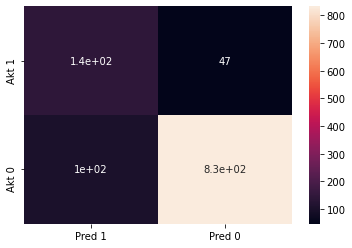

In [676]:
from sklearn.metrics import confusion_matrix, classification_report
y_DT_tuned_smote_test = DT_Tuned.predict(X_test)
print(classification_report(y_test, y_DT_tuned_smote_test))
cm_DT_tuned_smote_test = confusion_matrix(y_test, y_DT_tuned_smote_test, labels = [1,0])
df_DT_tuned_smote_test = pd.DataFrame(data=cm_DT_tuned_smote_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_DT_tuned_smote_test, annot=True)
plt.show()

### ==============================================================

## Random Forest Classifier

In [176]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [678]:
Model_RF = RandomForestClassifier()

In [679]:
Model_RF.fit(X_train, y_train)

RandomForestClassifier()

In [680]:
RF_Acc_train, RF_Rec_train, RF_Prec_train, RF_f1_train = Eva_Matrix(Model_RF, X_train, y_train)
RF_Acc_test, RF_Rec_test, RF_Prec_test, RF_f1_test = Eva_Matrix(Model_RF, X_test, y_test)
data_RF ={
    'RF Train' : [RF_Acc_train, RF_Rec_train, RF_Prec_train, RF_f1_train],
    'RF Test': [RF_Acc_test, RF_Rec_test, RF_Prec_test, RF_f1_test] 
}
pd.DataFrame(data=data_RF, index=['Accuracy', 'Recall','Precision','F1'])

,RF Train,RF Test
Accuracy,1.0,0.979574
Recall,1.0,0.894737
Precision,1.0,0.982659
F1,1.0,0.936639


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       936
           1       0.98      0.89      0.94       190

    accuracy                           0.98      1126
   macro avg       0.98      0.95      0.96      1126
weighted avg       0.98      0.98      0.98      1126



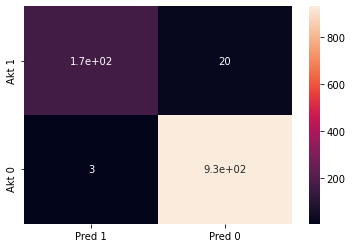

In [681]:
from sklearn.metrics import confusion_matrix, classification_report
y_RF_test = Model_RF.predict(X_test)
print(classification_report(y_test, y_RF_test))
cm_RF_test = confusion_matrix(y_test, y_RF_test, labels = [1,0])
df_RF_test = pd.DataFrame(data=cm_RF_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_RF_test, annot=True)
plt.show()

## Hyper Parameter Tuned Random Forest Classifier

In [682]:
param_RF = {
    "n_estimators" : [100, 200, 300, 400, 500],
    "max_depth" : [None, 2, 5],
    "min_samples_split" : np.arange(0, 20, 2),
    "min_samples_leaf" : np.arange(0, 20, 4),
    "max_features" : [None, np.arange(0, 0.6, 0.1)],
    "class_weight" : [{0 : x, 1 : 1 - x} for x in [.4, .45, .5]]
}

In [683]:
RF_Tuned = GridSearchCV(Model_RF, param_RF, cv = skf, n_jobs = -1, verbose = 1, scoring='recall')

In [183]:
RF_Tuned.fit(X_train, y_train)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:   23.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{0: 0.4, 1: 0.6}, {0: 0.45, 1: 0.55},
                                          {0: 0.5, 1: 0.5}],
                         'max_depth': [None, 2, 5],
                         'max_features': [None,
                                          array([0. , 0.1, 0.2, 0.3, 0.4, 0.5])],
                         'min_samples_leaf': array([ 0,  4,  8, 12, 16]),
                         'min_samples_split': array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])},
             scoring='recall', verbose=1)

In [184]:
RF_Tuned.best_params_

{'class_weight': {0: 0.4, 1: 0.6},
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 8}

## Fine Tuning Random Forest Classifier

In [880]:
RF_Tuned = RandomForestClassifier(class_weight = {0: 0.365, 1: 0.635}, max_depth = None, max_features = None, n_estimators = 225, min_samples_leaf = 2, min_samples_split = 46)

In [881]:
RF_Tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.365, 1: 0.635}, max_features=None,
                       min_samples_leaf=2, min_samples_split=46,
                       n_estimators=225)

In [882]:
y_predRF_tuned = RF_Tuned.predict(X_test)

In [883]:
df_RF_Tuned = Eva_Matrix1(RF_Tuned, X_train, y_train, X_test, y_test, "Model (RF Tuned)")
df_RF_Tuned

,Training Model (RF Tuned),Test Model (RF Tuned)
Accuracy,0.919627,0.898757
Recall,0.777045,0.710526
Precision,0.753197,0.695876
F1,0.764935,0.764935


              precision    recall  f1-score   support

           0       0.94      0.94      0.94       936
           1       0.70      0.71      0.70       190

    accuracy                           0.90      1126
   macro avg       0.82      0.82      0.82      1126
weighted avg       0.90      0.90      0.90      1126



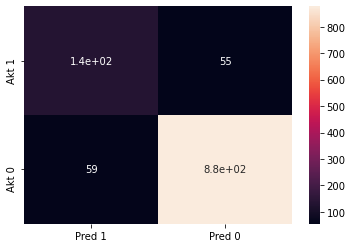

In [884]:
from sklearn.metrics import confusion_matrix, classification_report
y_RF_tuned_test = RF_Tuned.predict(X_test)
print(classification_report(y_test, y_RF_tuned_test))
cm_RF_tuned_test = confusion_matrix(y_test, y_RF_tuned_test, labels = [1,0])
df_RF_tuned_test = pd.DataFrame(data=cm_RF_tuned_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_RF_tuned_test, annot=True)
plt.show()

## SMOTE (Random Forest Classifier yang sudah di Improve)

In [671]:
from imblearn.over_sampling import SMOTE

In [672]:
sm = SMOTE(random_state=42)

In [673]:
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [674]:
df_SMOTE = pd.concat([X_train_sm, y_train_sm], axis=1)
df_SMOTE['Churn'].value_counts()

1    3746
0    3746
Name: Churn, dtype: int64

In [675]:
RF_Tuned.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(class_weight={0: 0.365, 1: 0.635}, min_samples_leaf=3,
                       min_samples_split=23)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       936
           1       0.58      0.75      0.66       190

    accuracy                           0.87      1126
   macro avg       0.76      0.82      0.79      1126
weighted avg       0.88      0.87      0.87      1126



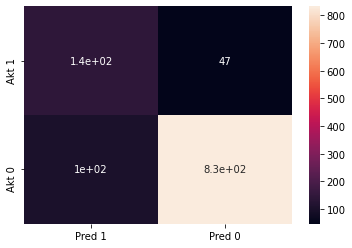

In [676]:
from sklearn.metrics import confusion_matrix, classification_report
y_RF_tuned_smote_test = RF_Tuned.predict(X_test)
print(classification_report(y_test, y_RF_tuned_smote_test))
cm_RF_tuned_smote_test = confusion_matrix(y_test, y_RF_tuned_smote_test, labels = [1,0])
df_RF_tuned_smote_test = pd.DataFrame(data=cm_RF_tuned_smote_test, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
sns.heatmap(df_RF_tuned_smote_test, annot=True)
plt.show()

# Conclusion Exploratory Data Analysis
- Customers yang melakukan Churn sebesar 16.83% dari seluruh total Customers.
- Berdasarkan data yang didapatkan, Customers yang melakukan Churn 65.83% menggunakan Mobile Phone, dan 34.17% menggunakan Computer.
- Mayoritas Customers yang melakukan Complain memilih untuk Churn sebesar 53.59%.
- Customers yang melakukan Churn di dominasi oleh Male sebesar 63.29%.
- Customers yang berdomisili di CityTier 1 dan 3 paling banyak melakukan Churn.
- Customers yang melakukan metode pembayaran Debit Card paling banyak melakukan Churn.
- Customers yang lebih tertarik pada Kategori Mobile Phone paling banyak melakukan Churn.
- Pengguna yang menghabiskan waktu 3 jam pada Aplikasi yang paling banyak melakukan Churn.
- Pengguna yang mendaftarkan Devicenya pada Apps, paling banyak melakukan Churn yaitu pada 4 Device.
- Berdasarkan SatisfactionScore Nilai 3 pada kepuasan yang diberikan oleh pelanggan yang paling banyak melakukan Churn.
- Berdasarkan MaritalStatus paling banyak status Single yang melakukan Churn.
- Berdasarkan data yang didapatkan, jumlah Alamat yang didaftarkan 2 dan 3 paling banyak melakukan Churn.
- Berdasarkan OrderAmountHikeFromlastYear kenaikan jumlah order dari tahun yang lalu mempengaruhi Churn pada customers.
- Penggunaan coupon 1 paling banyak yang melakukan Churn.
- Customers yang melakukan OrderCount 1 dan 2 paling banyak melakukan Churn.
- Mayoritas orang yang melakukan churn berkisaran pada orang yang berbelanja setelah 0-3 hari.
- Customers yang mendapatkan Cashback yang kategori high cenderung melakukan Churn.
- Customers yang Tenurenya 0 dan 1 bulan paling banyak melakukan Churn.

# Recommendation Exploratory Data Analysis
- Dikarenakan banyak dari pelanggan yang melakukan Churn pada Tenure nya 0 dan 1 bulan, maka dibuat agar Tenure kepada Customers memberikan benefit yang menarik, seperti iklan barang yang di preferred, diskon/cashback pada barang yang diinginkan, serta berlangganan dalam waktu yang lama lebih murah dibandingkan dengan berlangganan yang hanya 1 bulan.
- Aplikasi pada Mobile Phone dilakukan improvement dari segi tampilan dan performance agar pengguna dapat betah menggunakan Aplikasi E-Commerce.
- Untuk keluhan yang diberikan Customers agar ditanggapi oleh pihak E-Commerce sehingga keluhan yang diberikan oleh Customers dapat menjadi masukkan yang baik bagi E-Commerce.
- Diadakan promo yang menarik bagi Male/Pria agar untuk Gender Pria tidak melakukan Churn.
- Untuk Customer yang berlangganan Tenure dibawah 3 bulan tidak akan mendapatkan Coupon Cashback untuk menghindari adanya pemanfaatan promo cashback saja / Fraud.
- Pada E-Commerce untuk kategori Mobile Phone dilakukan improvement, dikarenakan banyak Customers yang Prefer terhadap kategori Mobile Phone melakukan Churn.

# Conclusion Machine Learning
- Model Machine Learning yang terbaik menggunakan Algoritma Decision Tree Classifier dengan hasil Recall (Training) yaitu 0.853562 dan Recall (Testing) yaitu 0.805263, dengan nilai False Negatif 37, False Positif 72, yang dilakukan Fine Tuning dengan parameter sebagai berikut :
    - class_weight = 0 : 0.365, 1 : 0.635
    - max_depth = None
    - max_features = None
    - min_samples_leaf = 3
    - min_samples_split = 23

# Recommendation Machine Learning
- Untuk False Negatif (Aktual Churn, Prediksi Tidak Churn) : Secara general dilakukan Optimize dan Improvement dari E-Commerce untuk menarik pelanggan, sehingga walau diprediksi Tidak Churn tetapi Aktualnya Churn dapat berpotensi untuk kembali menggunakan E-Commerce ini. Seperti pada Recommendation Exploratory Data Analysis kami.
- Untuk False Positif (Aktual Tidak Churn, Prediksi Churn) : Adain event undian untuk Free Tenure selama 3 bulan bagi Customers yang beruntung, tetapi saat undian berlangsung Free Tenure ini ditujukan kepada Customers yang False Positif, sehingga akan memberikan chance dia tetap stay selama prediksi kita Churn.